In [36]:
#Importing Libraries which are needed through out the program
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle


In [3]:
#Importing data
data=pd.read_excel(r"C:\Users\Mani chandhar Reddy\OneDrive\Desktop\Flight Price Prediction Using ML\Data\Data_Train.xlsx")
# Handle missing values
data.fillna(0, inplace=True)
#Viewing the sample of data:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Finding unique values in categorical data:
category=[]
category.append("Airline")
category.append("Source")
category.append("Destination")
category.append("Additional_Info")
for i in category:
    unique_values = data[i].unique()
    print(f"Unique values in {i}:")
    print(unique_values)


Unique values in Airline:
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Unique values in Source:
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Unique values in Destination:
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Unique values in Additional_Info:
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [5]:
#we now split the Date column to extract the "Date","Month" and "year"
data.Date_of_Journey=data.Date_of_Journey.str.split('/')
print(data.Date_of_Journey)
#Splitting the Data columns
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object


In [6]:
#Checking maximum no of stops:
Stops=data.Total_Stops.unique()
print(Stops)

['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']


In [7]:
#Based on Maximum no of stops we can split the cities from minimum 2 to maximum 6:
data.Route=data.Route.str.split('→')
print(data.Route)
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object


In [8]:
#Similarly we can split the departure time :
data.Dep_Time=data.Dep_Time.str.split(':')
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [9]:
#for the arrival date and arrival time separation, we split the ‘Arrival_Time’ column, and create ‘Arrival_date’ column. We also split the time and divide it into ‘Arrival_time_hours’ and ‘Arrival_time_minutes’, similar to what we did with the ‘Dep_time’ column
data.Arrival_Time=data.Arrival_Time.str.split(' ')
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [10]:
#Same process for Duration column also:
data.Duration=data.Duration.str.split(' ')
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]
data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [11]:
#Now lets replace the "Non-stop" into 0:
data.Total_Stops.replace('non-stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [12]:
#In Additional info column, we find that 'I' is capital in No Info so we replace it with "No info" to merge it into single category.
data.Additional_Info.replace('No Info','No info',inplace=True)

In [13]:
#Cheking Missing values:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops           3492
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                    1
City3                 3492
City4                 9117
City5                10637
City6                10682
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [14]:
#Now drop columns which has majority of null values:
data.drop(['City4','City5','City6'],axis=1,inplace=True)
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Time_of_Arrival'],axis=1,inplace=True)
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops          3492
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   1
City2                   1
City3                3492
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [16]:
#Now Treating Missing Values:
data['City3'].fillna('None',inplace=True)
data['Arrival_date'].fillna(data['Date'],inplace=True)
data['Travel_Mins'].fillna(0,inplace=True)
#After treating all the missing values lets check the Info of data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        7191 non-null   object
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Date               10683 non-null  object
 7   Month              10683 non-null  object
 8   Year               10683 non-null  object
 9   City1              10682 non-null  object
 10  City2              10682 non-null  object
 11  City3              10683 non-null  object
 12  Dep_Time_Hour      10683 non-null  object
 13  Dep_Time_Mins      10683 non-null  object
 14  Arrival_date       10683 non-null  object
 15  Arrival_Time_Hour  10683 non-null  object
 16  Arrival_Time_Mins  10683 non-null  objec

In [17]:
#Now lets change the data types of columns which consists of integer values:
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')

In [18]:
#for conversion of Travel_Hours we have to rectify a not convertable issue at index value 6474 where Travel_Hours=5m:
data.drop(index=6474,inplace=True,axis=0)
data.Travel_Hours=data.Travel_Hours.astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')

In [20]:
#Here Total_stops is not converting into int since it has a NAN Value some where in data so im changing it into 0:
data['Total_Stops'].fillna(0, inplace=True)
data.Total_Stops=data.Total_Stops.astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  int64 
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   Date               10682 non-null  int64 
 7   Month              10682 non-null  int64 
 8   Year               10682 non-null  int64 
 9   City1              10681 non-null  object
 10  City2              10681 non-null  object
 11  City3              10682 non-null  object
 12  Dep_Time_Hour      10682 non-null  int64 
 13  Dep_Time_Mins      10682 non-null  int64 
 14  Arrival_date       10682 non-null  int64 
 15  Arrival_Time_Hour  10682 non-null  int64 
 16  Arrival_Time_Mins  10682 non-null  int64

In [21]:
#Now seperate the columns based on their data types:
categorical=['Airline','Source','Destination','Additional_Info','City1','City2','City3']
Numerical=['Total_Stops','Price','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Travel_Mins']

In [22]:
#Now lets use label Encoding to convert Categorical data into integer values:
le=LabelEncoder()
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,0,7,3897,24,3,2019,0,13,29,22,20,22,1,10,2,50
1,1,3,0,2,7,7662,1,5,2019,2,25,1,5,50,1,13,15,7,25
2,4,2,1,2,7,13882,9,6,2019,3,32,4,9,25,10,4,25,19,0
3,3,3,0,1,7,6218,12,5,2019,2,34,3,18,5,12,23,30,5,25
4,3,0,5,1,7,13302,1,3,2019,0,34,8,16,50,1,21,35,4,45


In [23]:
#Now lets remove the unwanted or columns which does not impact the price:
data1=data[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Price']]
print(data1.head())
print(data1.describe())
print(data1.info())

   Airline  Source  Destination  Date  Month  Year  Dep_Time_Hour  \
0        3       0            5    24      3  2019             22   
1        1       3            0     1      5  2019              5   
2        4       2            1     9      6  2019              9   
3        3       3            0    12      5  2019             18   
4        3       0            5     1      3  2019             16   

   Dep_Time_Mins  Arrival_date  Arrival_Time_Hour  Arrival_Time_Mins  Price  
0             20            22                  1                 10   3897  
1             50             1                 13                 15   7662  
2             25            10                  4                 25  13882  
3              5            12                 23                 30   6218  
4             50             1                 21                 35  13302  
            Airline        Source   Destination          Date         Month  \
count  10682.000000  10682.000000  106

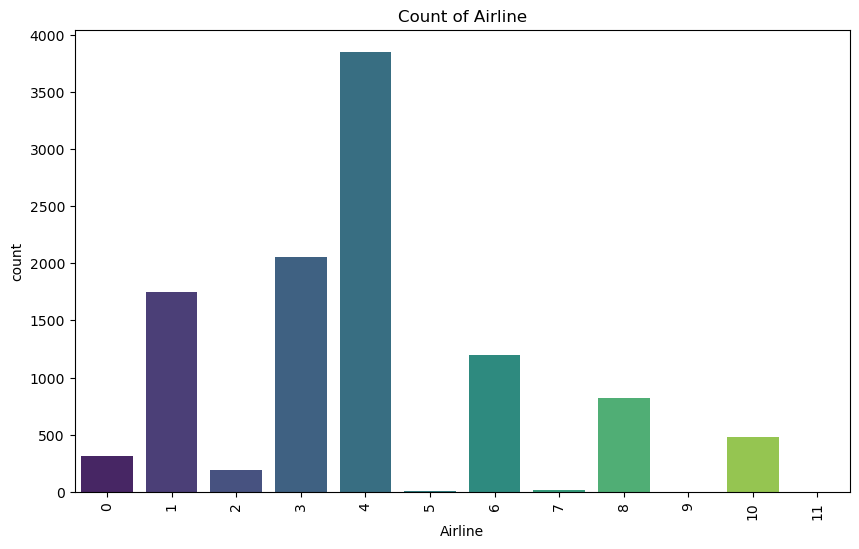

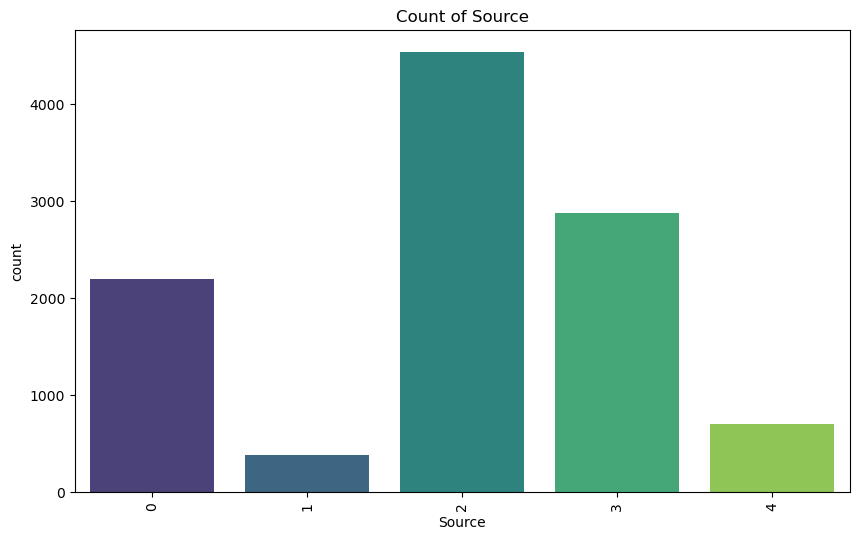

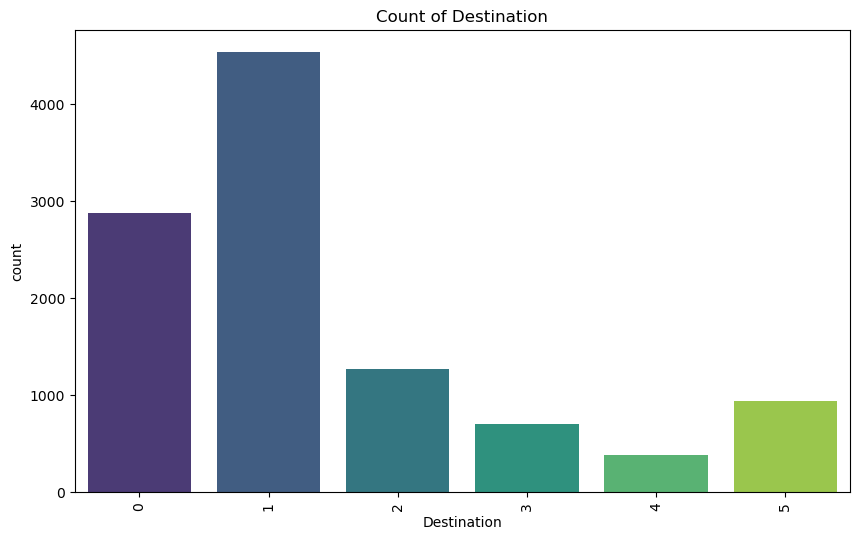

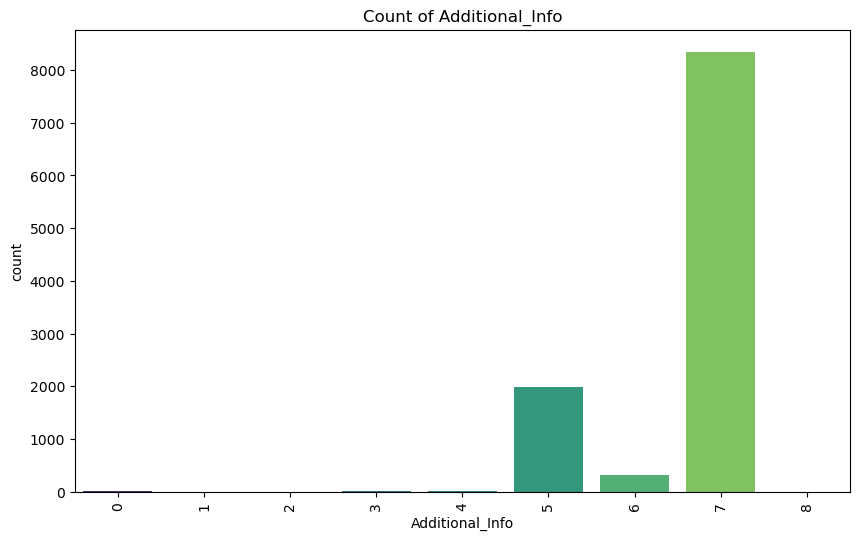

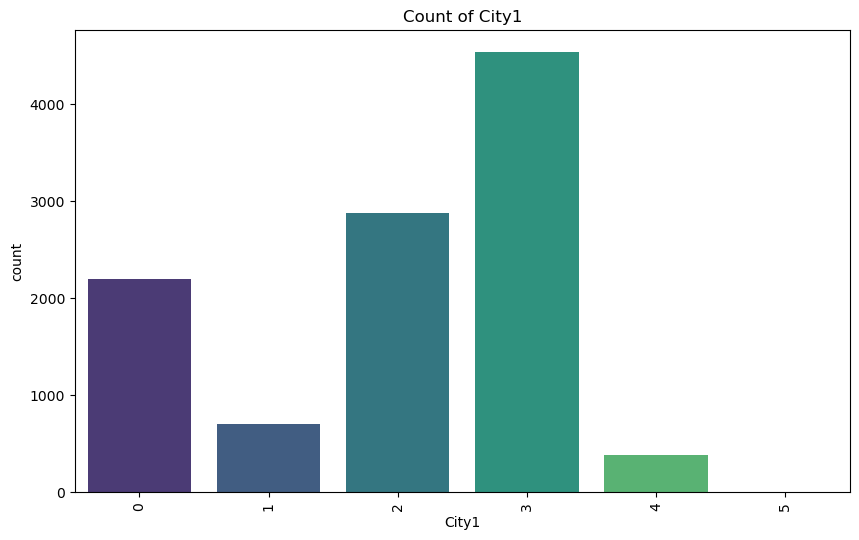

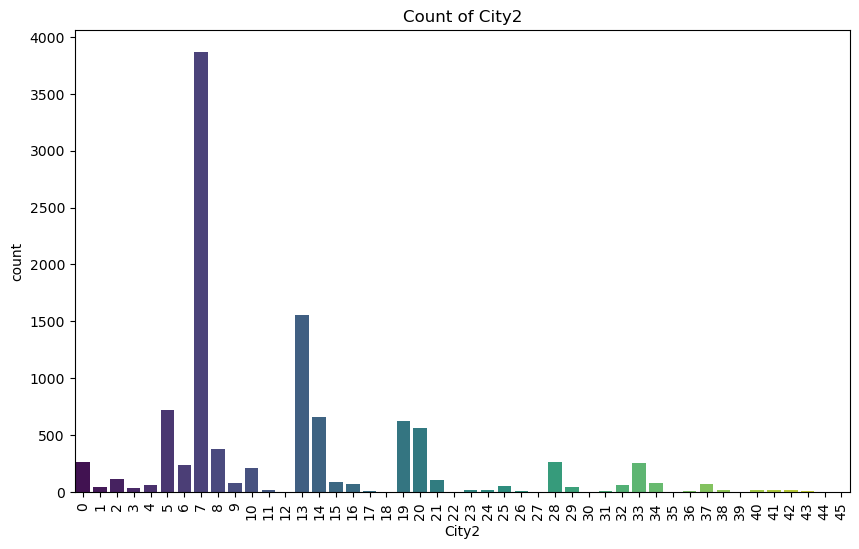

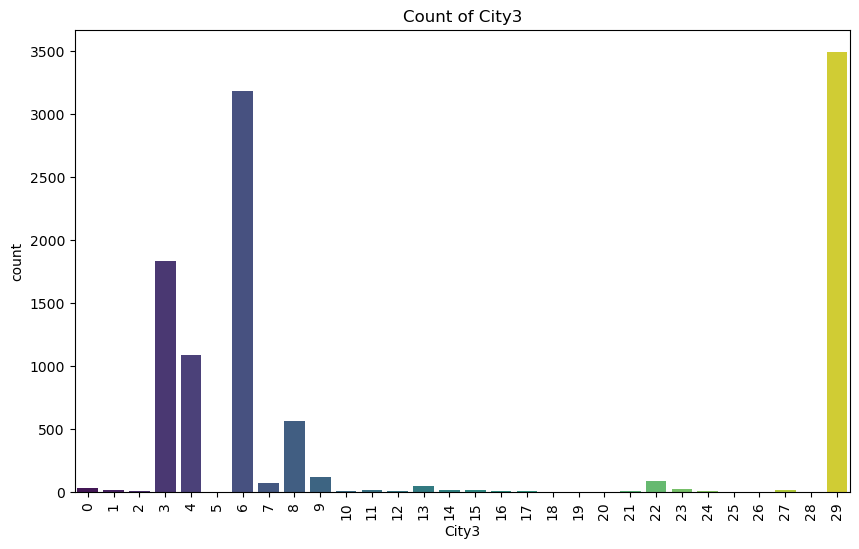

In [24]:
#Visual Analysis:
for col in categorical:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f'Count of {col}')
    plt.show()
#Here we are having some issues for visualizing multiple plots in single page so we are visualizing each plot individually.

<Figure size 1500x800 with 0 Axes>

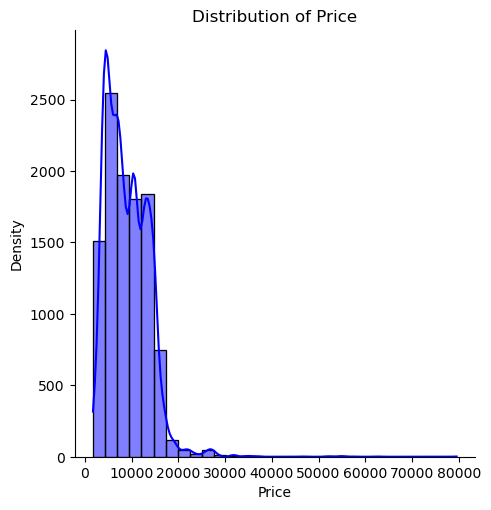

In [25]:
#Lets visualize Distribution of Price column:
plt.figure(figsize=(15, 8))
g = sns.displot(data=data, x='Price', kde=True, color='blue', bins=30)
g.set(xlabel='Price', ylabel='Density')
plt.title('Distribution of Price')
plt.show()

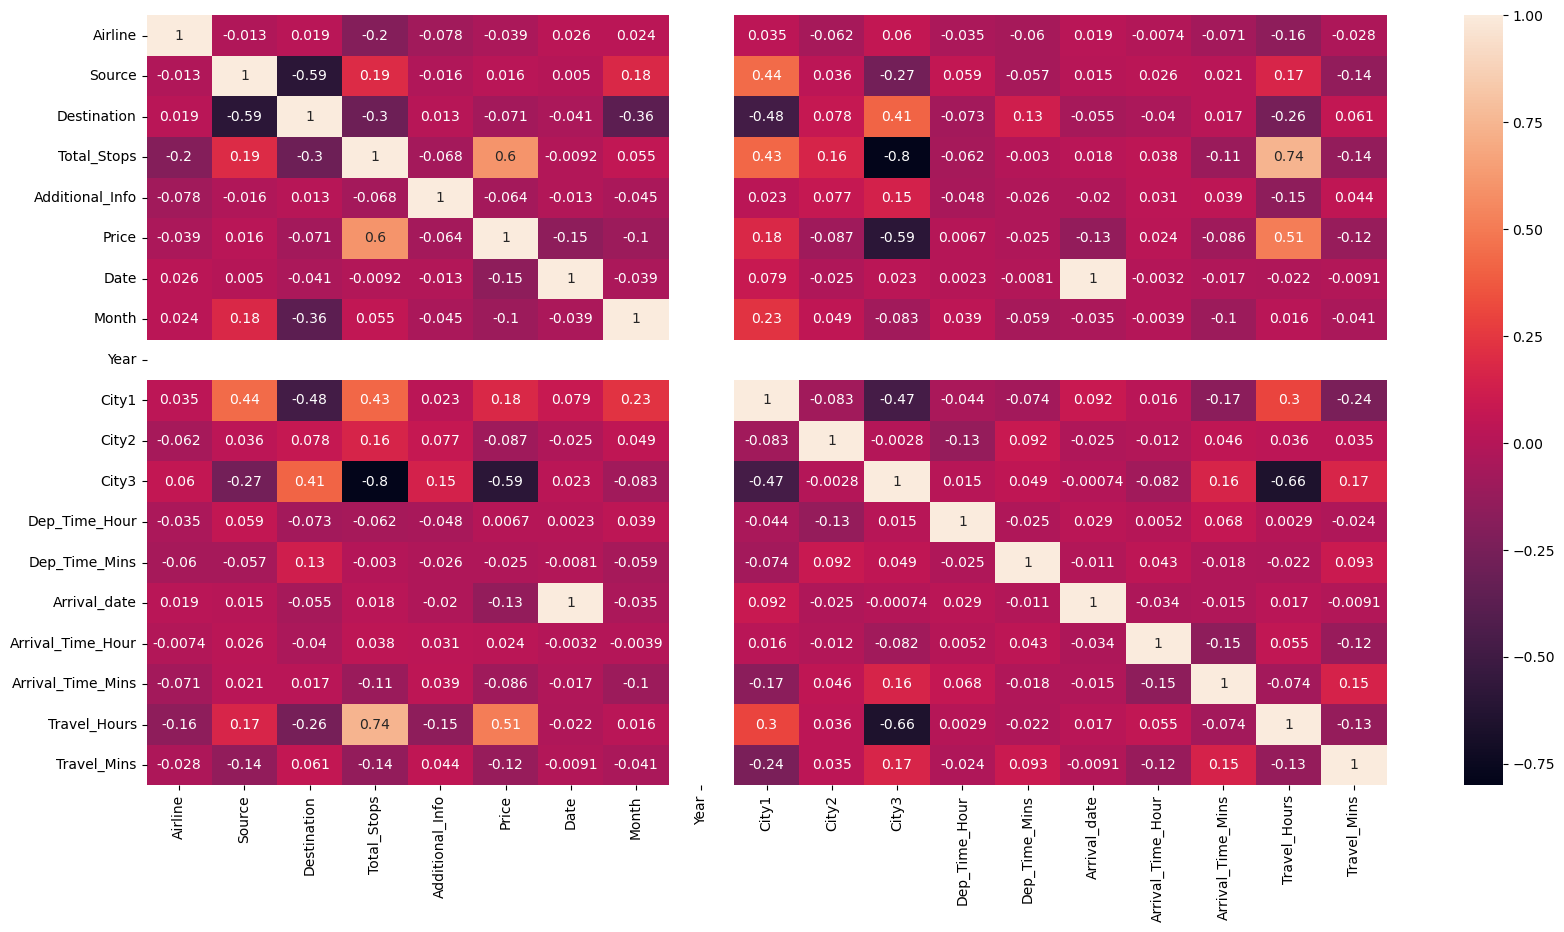

In [26]:
#Now lets check the Corrleation Using HeatMap
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

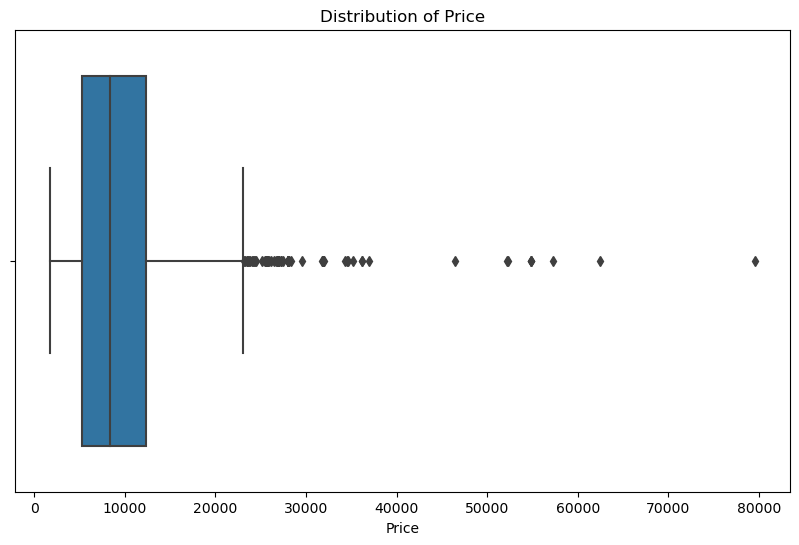

In [27]:
#Now lets find out outiliers in price column using boxplot:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price'])
plt.xlabel('Price')
plt.title('Distribution of Price')
plt.show()

In [28]:
#Scaling Data:
y=data1['Price']
x=data1.drop(columns=['Price'],axis=1)
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
print(x_scaled.head())

    Airline    Source  Destination      Date     Month  Year  Dep_Time_Hour  \
0 -0.410805 -1.658435     2.416778  1.237288 -1.467707   0.0       1.654268   
1 -1.261152  0.890299    -0.973732 -1.475307  0.250153   0.0      -1.303000   
2  0.014369  0.040721    -0.295630 -0.531796  1.109082   0.0      -0.607172   
3 -0.410805  0.890299    -0.973732 -0.177979  0.250153   0.0       0.958440   
4 -0.410805 -1.658435     2.416778 -1.475307 -1.467707   0.0       0.610527   

   Dep_Time_Mins  Arrival_date  Arrival_Time_Hour  Arrival_Time_Mins  
0      -0.234932      0.955750          -1.800319          -0.889984  
1       1.363674     -1.524648          -0.050813          -0.587017  
2       0.031502     -0.461621          -1.362943           0.018918  
3      -1.034235     -0.225392           1.407109           0.321885  
4       1.363674     -1.524648           1.115525           0.624852  


In [29]:
#Splitting data into train and test:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.head())

       Airline  Source  Destination  Date  Month  Year  Dep_Time_Hour  \
10005        6       2            1    27      5  2019              8   
3684         4       2            1     9      5  2019             11   
1034         8       2            1    24      4  2019             15   
3909         6       2            1    21      3  2019             12   
3088         1       2            1    24      6  2019             17   

       Dep_Time_Mins  Arrival_date  Arrival_Time_Hour  Arrival_Time_Mins  
10005             30            27                 19                 15  
3684              30            10                 12                 35  
1034              45            24                 22                  5  
3909              50            22                  1                 35  
3088              15            25                 19                 15  


In [30]:
#Training the Model in multiple algorithms:
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train, i.predict(x_train))
    if abs(train_score-test_score)<=0.2:
        print(i)
        print("R2 score is",r2_score(y_test,y_pred))
        print("R2 for train data" ,r2_score(y_train, i.predict(x_train)))
        print("Mean Absolute Error is" ,mean_absolute_error(y_pred,y_test))
        print( "Mean Squared Error is",mean_squared_error(y_pred,y_test))
        print( "Root Mean Sqaured Error is", (mean_squared_error(y_pred,y_test,squared=False)))

RandomForestRegressor()
R2 score is 0.8514679626864093
R2 for train data 0.9504535508978552
Mean Absolute Error is 1176.8075088435328
Mean Squared Error is 3139821.994727324
Root Mean Sqaured Error is 1771.9542868616347
GradientBoostingRegressor()
R2 score is 0.7652984210151785
R2 for train data 0.7338510043179753
Mean Absolute Error is 1682.5724410521439
Mean Squared Error is 4961361.826189309
Root Mean Sqaured Error is 2227.41146315388
AdaBoostRegressor()
R2 score is 0.20752400202368337
R2 for train data 0.21027785438664603
Mean Absolute Error is 3453.3034884669446
Mean Squared Error is 16752167.503676005
Root Mean Sqaured Error is 4092.941180089937


In [31]:
knn=KNeighborsRegressor()
lr=LinearRegression()
svr=SVR()
dt=DecisionTreeRegressor()
for i in [knn, svr, dt]:
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    test_score = r2_score(y_test, y_pred)
    train_score = r2_score(y_train, i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        print('R2 Score is', test_score)
        print('R2 Score for train data', train_score)
        print('Mean Absolute Error is', mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error is', mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error is', mean_squared_error(y_test, y_pred, squared=False))

SVR()
R2 Score is -0.030117446601644504
R2 Score for train data -0.023060876999700497
Mean Absolute Error is 3629.610207677262
Mean Squared Error is 21775675.29868014
Root Mean Squared Error is 4666.441395611879


In [32]:
#Checking cross validation for RandomForestRegressor:
# defining the parameters for the randomforest
n_estimators = [int(x) for x in np.linspace(start = 100, stop=1200,num=12)] # number of trees
max_features = ['sqrt'] # number feature for every split
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
# creating a random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features' : max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}
random_search = RandomizedSearchCV(lr, random_grid, cv=5, n_iter=10)
random_forest_cv = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
random_forest_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   4.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   4.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   4.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   4.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   4.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [33]:
#Testing the model:
#Testing using RandomForestRegressor and GradientBoostingRegressor():
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_features':['sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)
rf_res.fit(x_train,y_train)
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)
gb_res.fit(x_train,y_train)
# Calculate accuracy of the models
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
# Print the accuracies
print("rfr train accuracy",r2_score(y_train_pred,y_train))
print("rfr test accuracy",r2_score(y_test_pred,y_test))
gb=GradientBoostingRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
gb.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
# Print the accuracies
print("gb train accuracy",r2_score(y_train_pred,y_train))
print("gb test accuracy",r2_score(y_test_pred,y_test))
Price=data.Price
price_list=pd.DataFrame({'price':Price})
print(price_list)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
rfr train accuracy 0.9263352791016167
rfr test accuracy 0.7659353614984026
gb train accuracy 0.9263352791016167
gb test accuracy 0.7659353614984026
       price
0       3897
1       7662
2      13882
3       6218
4      13302
...      ...
10678   4107
10679   4145
10680   7229
10681  12648
10682  11753

[10682 rows x 1 columns]


In [34]:
#Saving the model:
file = open('Flight_random_forest_model.pkl','wb')
pickle.dump(random_forest_cv,file)
model=open('Flight_random_forest_model.pkl','rb')
random_forest = pickle.load(model)